## Amazon Translate

* 고품질 번역을 제공하는 텍스트 번역 서비스입니다. 
* 번역 종류
    * 표준번역기능
    * 커스텀 번역: 표준번역으로 지원하지 않는 특정 브랜드명이나 캐릭터명 같은 독자적인 용어를 커스텀 용어로 지정하여 번역에 적용할 수 있음.

[지원되는 언어]

https://docs.aws.amazon.com/ko_kr/translate/latest/dg/what-is-languages.html



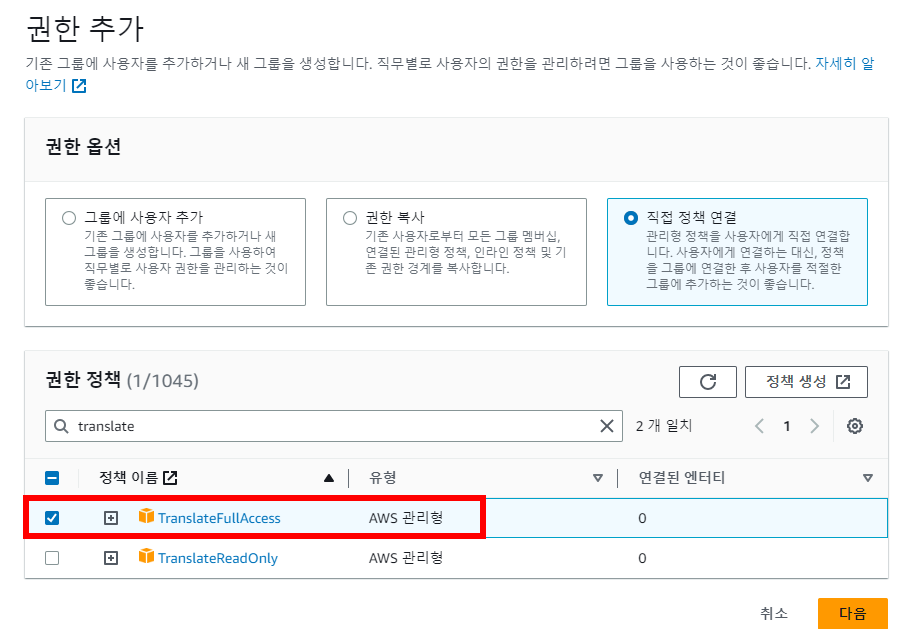

### 1. 표준번역으로 번역하기

https://en.wikipedia.org/wiki/Sukiyaki_(song)

In [1]:
import boto3
import json

client = boto3.client('translate', region_name='ap-northeast-2')

text = '''Sukiyaki is a song by Japanese crooner Kyu Sakamoto, first released in Japan in 1961. The song topped the charts in several countries, including on the Billboard Hot 100 in 1963. The song has grown to become one of the world\’s best-selling singles of all time, having sold over 13 million copies worldwide.'''

response = client.translate_text(
    Text=text,
    SourceLanguageCode='en', 
    TargetLanguageCode='ko'
)

response['TranslatedText']

'스키야키는 1961년 일본에서 처음 발매된 일본 크루너 큐 사카모토의 노래입니다.이 노래는 1963년 빌보드 핫 100을 비롯한 여러 국가의 차트에서 1위를 차지했습니다.이 노래는 전 세계적으로 1,300만 장 이상 판매된 역대 세계 베스트셀러 싱글 중 하나로 성장했습니다.'

> 제목은 그대로 스키야키로 번역되었고, 요리인 스키야키와 혼동되고 있지는 않다. 

### 2.커스텀 용어를 사용한 번역

* '스키야키'라는 제목이 일본에서는 '위를 향해 걷자'로 알려져 있기 때문에 이를 반영해 번역되도록 합시다. 
* 커스텀 용어는 CSV나 XML파일로 정의합니다. 

[커스텀 용어 정의 파일만들기]
* 파일이름: my_terminology.csv
* 1라인: 언어코드 설정(영어를 한국어로: en,ko)
* 2라인: 커스텀 용어 정의

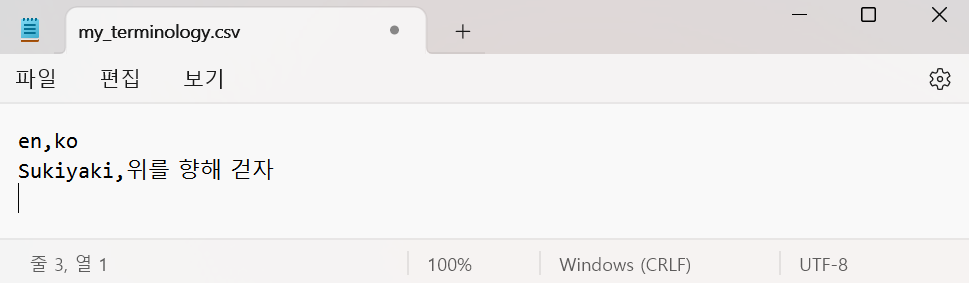

In [2]:
import boto3
import json

client = boto3.client('translate', region_name='ap-northeast-2')

#커스텀용어 정의파일 임포트하기
with open('my_terminology.csv', 'rb') as mt:
    bytes_data = mt.read()
    response = client.import_terminology(
        Name='my_terminology',
        MergeStrategy='OVERWRITE',
        TerminologyData={
            'File': bytes_data,
            'Format': 'CSV'
	    }
    )

In [3]:
#임포트 되었는지 확인
client.list_terminologies()

{'TerminologyPropertiesList': [{'Name': 'my_terminology',
   'Arn': 'arn:aws:translate:ap-northeast-2:446431821573:terminology/my_terminology/LATEST',
   'SourceLanguageCode': 'en',
   'TargetLanguageCodes': ['ko'],
   'SizeBytes': 36,
   'TermCount': 1,
   'CreatedAt': datetime.datetime(2023, 4, 4, 11, 26, 52, 743000, tzinfo=tzlocal()),
   'LastUpdatedAt': datetime.datetime(2023, 4, 4, 12, 40, 22, 681000, tzinfo=tzlocal()),
   'Format': 'CSV'}],
 'ResponseMetadata': {'RequestId': '584116f0-c9ba-4442-a9b0-d754e7ece95a',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '584116f0-c9ba-4442-a9b0-d754e7ece95a',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '306',
   'date': 'Tue, 04 Apr 2023 03:40:23 GMT'},
  'RetryAttempts': 0}}

In [4]:
text = '''Sukiyaki is a song by Japanese crooner Kyu Sakamoto, first released in Japan in 1961. The song topped the charts in several countries, including on the Billboard Hot 100 in 1963. The song has grown to become one of the world\’s best-selling singles of all time, having sold over 13 million copies worldwide.'''

response = client.translate_text(
    Text=text,
    TerminologyNames=['my_terminology'],
    SourceLanguageCode='en',
    TargetLanguageCode='ko'
)

response['TranslatedText']

'위를 향해 걷자 1961년 일본에서 처음 발매된 일본 크루너 큐 사카모토의 노래입니다.이 노래는 1963년 빌보드 핫 100을 비롯한 여러 국가의 차트에서 1위를 차지했습니다.이 노래는 전 세계적으로 1,300만 장 이상 판매된 역대 세계 베스트셀러 싱글 중 하나로 성장했습니다.'

> '스키야키'라고 번역되었던 부분이 '위를 향해 걷자'라고 바뀐것을 확인할 수 있습니다. 